In [1]:
import numpy as np
import matplotlib.pyplot as plt
class HTC_cell():
    #class variables - ig in this all the conductances and constants should be placed
    #constants
    h1 = 0.01 #dt
    #conductances
    g_Na=90
    g_K=10
    g_L=0.01
    g_KL=0.0069
    g_h= 0.36
    g_AHP = 15
    g_TLT =2
    g_THT =12

    #potentials
    E_Na=50
    E_K=-100
    E_L=-70
    E_h= -40
    def __init__(self,V,m,n,h,r,Ca,m_AHP,h_TLT,h_THT):
        self.V = V
        self.m=m
        self.n=n
        self.h=h
        self.r=r
        self.Ca=Ca
        self.m_AHP = m_AHP
        self.h_TLT = h_TLT
        self.h_THT = h_THT
    def alpha_m(self):
        V_t = self.V+25
        return 0.32*(13-V_t)/(np.exp((13-V_t) / 4.0)-1.0)

    def beta_m(self):
        V_t = self.V+25
        return 0.28*(V_t-40)/(np.exp((V_t-40) / 5.0)-1)

    def alpha_h(self):
        V_t = self.V+25
        return 0.128*np.exp((17.0-V_t) / 18.0)

    def beta_h(self):
        V_t = self.V+25
        return (4.0/(np.exp((40.0-V_t)/5.0)+1))

    def alpha_n(self):
        V_t = self.V+25
        return 0.032*(15.0-V_t)/( np.exp((15-V_t) / 5.0)-1)

    def beta_n(self):
        V_t = self.V+25
        return 0.5*np.exp((10-V_t) / 40.0)

    def r_inf(self):
        return 1/(1+np.exp((self.V+60)/5.5))

    def t_r(self):
        return (20 + (1000/(np.exp((self.V+56.5)/14.2 + np.exp(-(self.V+74)/11.6)))))

    def m_AHP_inf(self):
        return 48*self.Ca**2/((48*self.Ca**2)+0.09)

    def t_m_AHP(self):
        return 1/((48*self.Ca**2)+0.09)

    def m_TLT_inf(self):
        V_t = self.V+2
        return 1/((np.exp(-(57+V_t)/6.2))+1.0)

    def h_inf_TLT(self):
        V_t = self.V+2
        return 1/(1.0+np.exp((V_t+81.0)/4.0))

    def t_inf_TLT(self):
        V_t = self.V+2
        return (30.8+((211.4+np.exp((V_t+113.2)/5.0))/(1+np.exp(V_t+84.0)/3.2)))/3.74

    def E_Ca(self):
        return 2.303*8.314*np.log(2/self.Ca)/(2*96485)

    def m_THT_inf(self):
        V_t = self.V+2
        return 1/(np.exp(-(40.1+V_t)/3.5)+1)

    def h_inf_THT(self):
        V_t = self.V+2
        return 1/(1+np.exp((V_t+62.2)/5.5))

    def t_inf_THT(self):
        V_t = self.V+2
        return 0.1483*(np.exp(-0.09398*V_t))+ 5.284*(np.exp(0.008855*V_t))
    
    def I_Na(self):
        return self.g_Na*(self.m**3)*self.h*(self.V-self.E_Na)
        
    def I_K(self):
        return self.g_K*(self.n**4)*(self.V-self.E_K)

    def I_L(self):
        return self.g_L*(self.V-self.E_L) + self.g_KL*(self.V-self.E_K)

    def I_H(self):
        return self.g_h*self.r*(self.V-self.E_h)

    def I_AHP(self):
        return self.g_AHP*(self.m_AHP**2)*(self.V-self.E_K)

    def I_TLT(self):
        return self.g_TLT*(self.m_TLT_inf()**2)*self.h_TLT*(self.V-self.E_Ca())
        
    def I_THT(self):
        return self.g_THT*(self.m_THT_inf()**2)*self.h_THT*(self.V-self.E_Ca())
    
    def f_V(self):
        I=0
        dVdt=I-self.I_Na()-self.I_K()-self.I_L()- self.I_H() -self.I_TLT() - self.I_THT() - self.I_AHP()
        return dVdt

    def f_m(self):
        dmdt=self.alpha_m()*(1-self.m)-self.beta_m()*self.m
        return dmdt

    def f_h(self):
        dhdt=self.alpha_h()*(1-self.h)-self.beta_h()*self.h
        return dhdt
    
    def f_n(self):
        dndt=self.alpha_n()*(1-self.n)-self.beta_n()*self.n
        return dndt

    def f_r(self):
        drdt=(self.r_inf() -self.r)/self.t_r()
        return drdt

    def f_m_AHP(self):
        return (self.m_AHP_inf() - self.m_AHP)/self.t_m_AHP()

    def f_Ca(self):
        return (-10*(self.I_TLT()+ self.I_THT() )/(2*96489) + (0.00024 - self.Ca)/3.0)

    def f_h_TLT(self):
        return (self.h_inf_TLT() - self.h_TLT)/self.t_inf_TLT()

    def f_h_THT(self):
        return (self.h_inf_THT() - self.h_THT)/self.t_inf_THT()
    
    def integrator(self):
        h1=0.01
        self.V=self.V+(self.f_V()+ np.random.normal(0,1,1)*h1**(0.5))*h1 
        #Y=Y+(f_V(Y,m,h,n,I,r,Ca, h_TLT,h_THT, m_AHP) + np.random.normal(0,1,1)*h1**(0.5))*h1 
        self.m=self.m+self.f_m()*h1
        self.h=self.h+self.f_h()*h1
        self.n=self.n+self.f_n()*h1
        self.r=self.r+self.f_r()*h1
        self.m_AHP= self.m_AHP+self.f_m_AHP()*h1
        self.Ca= self.Ca+ self.f_Ca()*h1
        self.h_TLT =self.h_TLT + self.f_h_TLT()*h1
        self.h_THT =self.h_THT + self.f_h_THT()*h1
        return self.V
    


In [18]:
V = -60
m=0.6
n=0.1
h=0.2
r=7.76347208e-02
Ca=2.58531488e-04
h_TLT= 4.42457678e-04
h_THT=7.16624141e-02
m_AHP = 8.67441820e-05
ob = HTC_cell(V,m,n,h,r,Ca,m_AHP,h_TLT,h_THT)
l = []
time =[]
for t in np.arange(0,1000,0.01):
    l.append(float(V))
    time.append(t)
    V=ob.integrator()
    

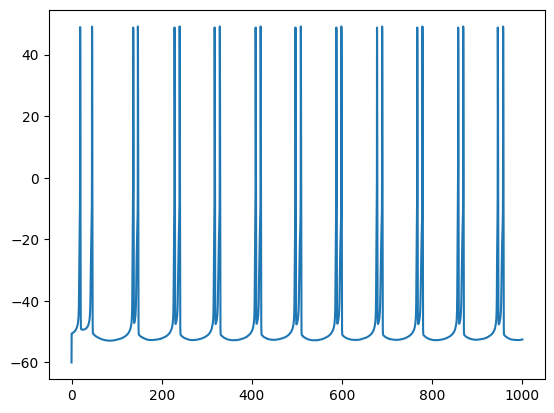

In [19]:
plt.plot(time,l)